In [1]:
#import the data
with open('hw4_vocab.txt') as f:
    vocab = f.read().splitlines()
with open('hw4_unigram.txt') as f1:
    unigram = f1.read().splitlines()
bigram = []
with open('hw4_bigram.txt') as f2:
    for line in f2:
        bigram.append(line.strip().split('\t'))        

In [2]:
#(a)
for i in range(len(unigram)):
    unigram[i] = int(unigram[i])
total_num_word = sum(unigram)
unigram_prob = []
for i in range(len(unigram)):
    unigram_prob.append(unigram[i]/total_num_word)
word_with_prob = list(zip(vocab,unigram_prob)) #vocabulary number, prob of that vocabulary

token_begin_M = []
for j in range(len(word_with_prob)):
    if word_with_prob[j][0][0] == 'M':
        token_begin_M.append(word_with_prob[j]) 
print(token_begin_M)
#end of (a)

[('MILLION', 0.002072759168154815), ('MORE', 0.0017088989966186725), ('MR.', 0.0014416083492816956), ('MOST', 0.0007879173033190295), ('MARKET', 0.0007803712804681068), ('MAY', 0.0007298973156289532), ('M.', 0.0007034067394618568), ('MANY', 0.0006967290595970209), ('MADE', 0.0005598610827336895), ('MUCH', 0.0005145971758110562), ('MAKE', 0.0005144626437991272), ('MONTH', 0.00044490959363187093), ('MONEY', 0.00043710673693999306), ('MONTHS', 0.0004057607781605526), ('MY', 0.0004003183467688823), ('MONDAY', 0.00038198530259784006), ('MAJOR', 0.00037089252670515475), ('MILITARY', 0.00035204581485220204), ('MEMBERS', 0.00033606096579846475), ('MIGHT', 0.00027358919153183117), ('MEETING', 0.0002657374141083427), ('MUST', 0.0002665079156312084), ('ME', 0.00026357267173457725), ('MARCH', 0.0002597935452176646), ('MAN', 0.0002528834918776787), ('MS.', 0.0002389900041002911), ('MINISTER', 0.00023977273580605944), ('MAKING', 0.00021170446604452378), ('MOVE', 0.0002099555498894477), ('MILES', 0.0

In [3]:
#the string in bigram become integer   
for i in range(len(bigram)):
    bigram[i][0] = int(bigram[i][0])
    bigram[i][1] = int(bigram[i][1])
    bigram[i][2] = int(bigram[i][2])
#form dictionary of number and actual word, number is the key
number_and_word=dict(zip(range(1,501),vocab))
word_and_number=dict(zip(vocab,range(1,501)))#now word is the key
#number_and_word[16]=='THAT'
#word_and_number['THAT']==16
 

In [4]:
#calculate the prob of every row in bigram
def bi_prob(a):
    bigram_1 =[d for d in bigram if d[0]==a]
    sum_1=0
    for d in bigram_1:
        sum_1+=d[2]
    bigram_1_prob = []
    for d in bigram_1:
        bigram_1_prob.append(d[2]/sum_1)
    return bigram_1_prob
#bigram_prob is the total prob of bigram
bigram_prob=[]
for i in range(1,501):
    bigram_prob.append(bi_prob(i))


In [5]:
#(b) for word "the"
the_prob=bigram_prob[word_and_number['THE']-1]
the_bigram=[d[1] for d in bigram if d[0]==4] #get the order of word which goes after word "the"
the_word_prob =list(zip(the_bigram,the_prob))
sorted_by_second=sorted(the_word_prob,key=lambda tup:tup[1],reverse=True)#sort from high to low
for i in range(10):
    print(number_and_word[sorted_by_second[i][0]],sorted_by_second[i][1])
#end of (b)

<UNK> 0.6150198100055118
U. 0.013372499432610317
FIRST 0.011720260675031612
COMPANY 0.011658788055636611
NEW 0.009451480076516552
UNITED 0.008672308141231398
GOVERNMENT 0.006803488635995202
NINETEEN 0.006650714911000876
SAME 0.006287066757449016
TWO 0.006160749602827221


In [6]:
#(c) calculate L_unigram
import math
sentence_u=['THE','STOCK','MARKET','FELL','BY','ONE','HUNDRED','POINTS','LAST','WEEK']
log_unigram=0
for i in sentence_u:
    row_number=word_and_number[i]-1
    log_unigram=log_unigram+math.log(word_with_prob[row_number][1])
log_unigram
#end of calculate of L_unigram

-64.50944034364878

In [7]:
#(c) calculate L_bigram
def log_prob_bigram(value,value_next):  #calculate for logPb(|)
    bigram_value =[d for d in bigram if d[0]==value]
    sum_value=0
    for d in bigram_value:
        sum_value+=d[2]
    for i in bigram_value:
        if i[1]==value_next:
            time = i[2]
    node_prob=time/sum_value
    return math.log(node_prob)
sentence_b=['<s>','THE','STOCK','MARKET','FELL','BY','ONE','HUNDRED','POINTS','LAST','WEEK']
number_sentence_b=[word_and_number[i] for i in sentence_b]
log_bigram=0
for i in range(len(number_sentence_b)-1):
    value=number_sentence_b[i]
    value_next=number_sentence_b[i+1]
    log_bigram+=log_prob_bigram(value,value_next)
log_bigram
#end of calculate of L_bigram

-40.91813213378977

In [10]:
#(d)calculate L_unigram
sentence_in_d=['THE','SIXTEEN','OFFICIALS','SOLD','FIRE','INSURANCE']
log_unigram_d=0
for i in sentence_in_d:
    row_number=word_and_number[i]-1
    log_unigram_d=log_unigram_d+math.log(word_with_prob[row_number][1])
print('log-likelihood for unigram = ',log_unigram_d)
#end of calculate L_unigram

log-likelihood for unigram =  -44.291934473132606


In [13]:
#(d)calculate L_bigram
sentence_in_d=['<s>','THE','SIXTEEN','OFFICIALS','SOLD','FIRE','INSURANCE']
number_sentence_in_d=[word_and_number[i] for i in sentence_in_d]
for i in range(0,2):
    value=number_sentence_in_d[i]
    value_next=number_sentence_in_d[i+1]
    prob=log_prob_bigram(value,value_next)
    print('likelihood of P(',number_and_word[value_next],'|',number_and_word[value],')',' = ',prob)
for i in range(3,4):
    value=number_sentence_in_d[i]
    value_next=number_sentence_in_d[i+1]
    prob=log_prob_bigram(value,value_next)
    print('likelihood of P(',number_and_word[value_next],'|',number_and_word[value],')',' = ',prob)
for i in range(5,6):
    value=number_sentence_in_d[i]
    value_next=number_sentence_in_d[i+1]
    prob=log_prob_bigram(value,value_next)
    print('likelihood of P(',number_and_word[value_next],'|',number_and_word[value],')',' = ',prob)

likelihood of P( THE | <s> )  =  -1.841038159539023
likelihood of P( SIXTEEN | THE )  =  -8.38392121057695
likelihood of P( SOLD | OFFICIALS )  =  -9.297838297248664
likelihood of P( INSURANCE | FIRE )  =  -5.791827268104339


In [14]:
#(e)
import matplotlib.pyplot as plt
def prob_mgram(value,value_next,lam):  #calculate for Pb(|)
    bigram_value =[d for d in bigram if d[0]==value]
    sum_value=0
    for d in bigram_value:
        sum_value+=d[2]
    for i in bigram_value:
        if i[1]==value_next:
            time = i[2]
            break
        else:
            time = 0
    p_b=time/sum_value #P_b(w'|w)
    p_m=(1.0-lam)*p_b+lam*word_with_prob[value_next-1][1]
    log_pm = math.log(p_m)
    return log_pm


sentence_e = ['<s>','THE','SIXTEEN','OFFICIALS','SOLD','FIRE','INSURANCE']
number_sentence_in_d=[word_and_number[i] for i in sentence_in_d]





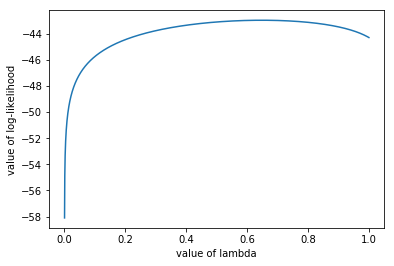

In [15]:

value_lam=[x/5000 for x in range(1,5000)]
value_Lm=[]
for j in range(len(value_lam)):
    lam=value_lam[j]
    L=0
    for i in range(6):
        value=number_sentence_in_d[i]
        value_next=number_sentence_in_d[i+1]
        L+=prob_mgram(value,value_next,lam)
    value_Lm.append(L)
plt.plot(value_lam,value_Lm)
plt.ylabel('value of log-likelihood')
plt.xlabel('value of lambda')
plt.show()

In [18]:
new=list(zip(value_lam,value_Lm))
new[2500:3500]


[(0.5002, -43.09657701637947),
 (0.5004, -43.096216822741425),
 (0.5006, -43.09585714088507),
 (0.5008, -43.095497970653895),
 (0.501, -43.09513931189182),
 (0.5012, -43.09478116444316),
 (0.5014, -43.09442352815265),
 (0.5016, -43.09406640286544),
 (0.5018, -43.09370978842708),
 (0.502, -43.09335368468353),
 (0.5022, -43.09299809148118),
 (0.5024, -43.09264300866679),
 (0.5026, -43.09228843608756),
 (0.5028, -43.091934373591094),
 (0.503, -43.0915808210254),
 (0.5032, -43.09122777823889),
 (0.5034, -43.090875245080376),
 (0.5036, -43.090523221399096),
 (0.5038, -43.09017170704468),
 (0.504, -43.08982070186718),
 (0.5042, -43.089470205717035),
 (0.5044, -43.0891202184451),
 (0.5046, -43.088770739902635),
 (0.5048, -43.0884217699413),
 (0.505, -43.088073308413165),
 (0.5052, -43.087725355170704),
 (0.5054, -43.087377910066785),
 (0.5056, -43.08703097295471),
 (0.5058, -43.08668454368813),
 (0.506, -43.08633862212115),
 (0.5062, -43.085993208108256),
 (0.5064, -43.08564830150434),
 (0.50